### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [1]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

import numpy as np # уже знакомые нам библиотеки
import pandas as pd

from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
register_matplotlib_converters() 
import time
import datetime
import seaborn as sns # наводим красоту
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'
import plotly # импортируем библиотеку
import plotly.graph_objects as go # основной модуль
import plotly.express as px # самый популярные графики

%matplotlib inline

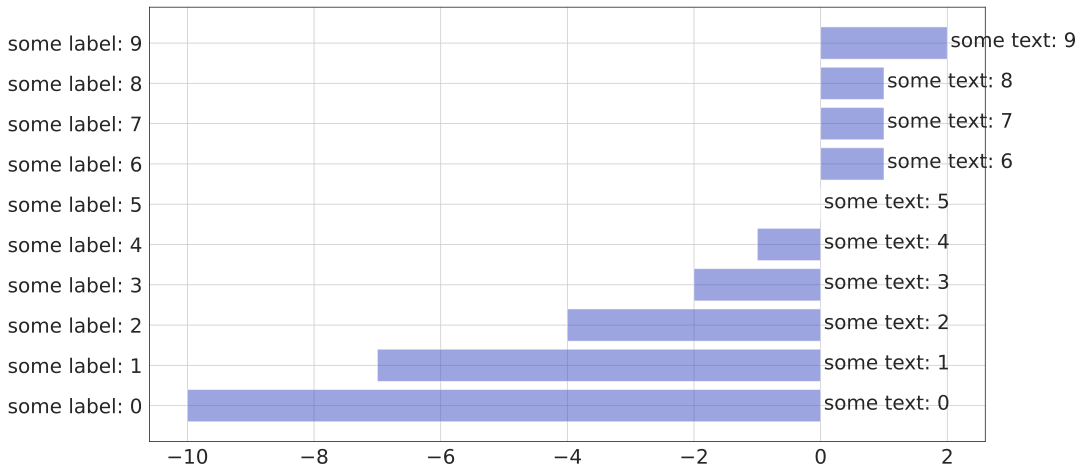

In [2]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (15, 8)

def plot_horizontal_bar(b_l, lbs, y_lbs, fs):
  plt.figure(figsize=fs)
  width = 0.8
  plt.barh(lbs, b_l, width, color = '#3b4cc0',tick_label=y_lbs,alpha=0.5)  
  for i, v in enumerate(b_l):
    plt.text(max(v,0) + .05, i-.1 , lbs[i],fontsize=20),
  plt.tick_params(axis='both', labelsize=20)
  plt.grid(True)
  return plt.show()
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

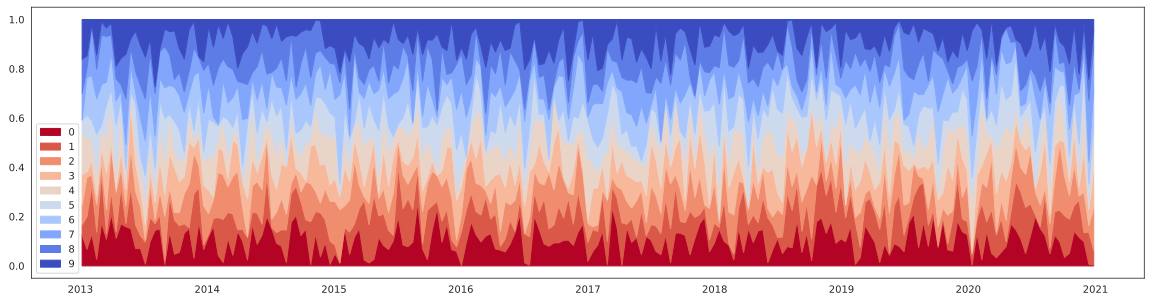

In [3]:
# Сигнатура функции и пример вывода:
# import datetime

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)
def plot_time_probabilities(p_i_t, fs):
  col=['#b40426','#d95847','#f18d6f','#f7b89c','#ead4c8','#cdd9ec','#aac7fd','#82a6fb','#5d7ce6','#3b4cc0']
  plt.figure(figsize=fs)
  ttt=0
  for i in range(10):
    plt.fill_between(p_i_t.index,ttt+p_i_t[i], ttt, color=col[i])
    plt.legend(p_i_t,loc='lower left')
    ttt+=p_i_t[i]
  return plt.show()

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

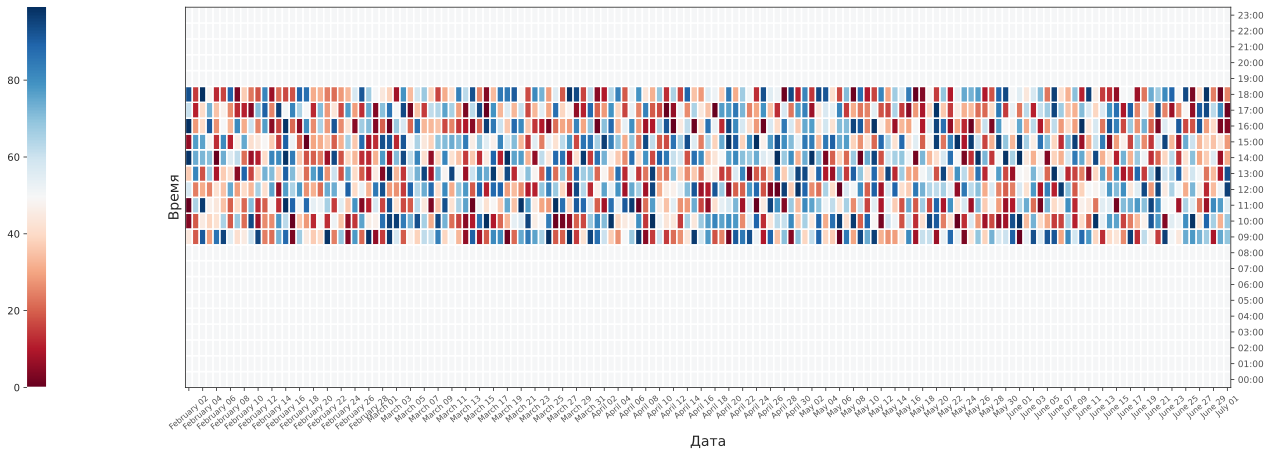

In [4]:
# Сигнатура функции и пример вывода:
# from matplotlib.colors import LinearSegmentedColormap
from pandas import DataFrame
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)

def plot_intraday_ts(id_ts, fs):
  intraday_ts.fillna(50, inplace=True)
  fig, ax = plt.subplots(figsize = fs)
  id=DataFrame()
  id['flo'] = [id_ts[i] for i in range(len(id_ts))]
  nmp=id['flo'][0:3624].to_numpy().reshape(151,24).T
  ax= sns.heatmap(nmp, fmt='d', cmap= 'RdBu', linewidths=1.5, linecolor='white', cbar_kws = dict(use_gridspec=False,location="left"))
  ax.set_xticklabels(pd.date_range('2020-02-02', '2020-07-01', freq='2D').strftime('%B %d'),fontsize=8, rotation=40,alpha=0.8)
  ylbl=pd.date_range('00:00','23:00',freq='1H').strftime('%H:%M')
  ax.set_yticklabels(ylbl,fontsize=9, rotation=0,alpha=0.8)
  for _, spine in ax.spines.items():
    spine.set_visible(True)
  ax.invert_yaxis()
  ax.yaxis.set_ticks_position('right')
  ax.xaxis.set_ticks_position('bottom')
  # i, k = ax.get_ylim()
  # ax.set_ylim(i-3, k)
  plt.xlabel('Дата',fontsize=14)
  plt.ylabel('Время',fontsize=14)
  return plt.show()

plot_intraday_ts(intraday_ts, figsize)
